todo
    son 10 yılın verilerini al
    tahmini göster testi değil
    veriler hatalı geliyormuş bunu düzelt :P
durumlar
    4 lü grafikteki adj close yerine close değeri kullanıldı


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf 

from datetime import datetime, timedelta

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import plot_model

In [2]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ['Apple', 'Google', 'Microsoft', 'Amazon']
dfs = []

end_date = datetime(2023, 10, 29)
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

for stock in stocks:
    df = yf.Ticker(stock).history(start=start_date, end=end_date)
    dfs.append(df)

for index, company_name in enumerate(company_names):
    dfs[index]['company_name'] = company_name


In [4]:
apple = dfs[0]
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name
Date,,,,,,,,
2022-10-31 00:00:00-04:00,152.256768,153.330401,151.024075,152.435699,97943200,0.00,0.0,Apple
2022-11-01 00:00:00-04:00,154.165433,154.533246,148.250526,149.761551,80379300,0.00,0.0,Apple
2022-11-02 00:00:00-04:00,148.071578,151.272590,144.144876,144.174698,93604600,0.00,0.0,Apple
2022-11-03 00:00:00-04:00,141.222213,141.957854,137.931736,138.060974,97918500,0.00,0.0,Apple
2022-11-04 00:00:00-04:00,141.486344,142.063882,133.809108,137.792114,140814800,0.23,0.0,Apple
...,...,...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,170.910004,174.009995,169.929993,173.000000,55980100,0.00,0.0,Apple
2023-10-24 00:00:00-04:00,173.050003,173.669998,171.449997,173.440002,43816600,0.00,0.0,Apple
2023-10-25 00:00:00-04:00,171.880005,173.059998,170.649994,171.100006,57157000,0.00,0.0,Apple


In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-10-31 00:00:00-04:00 to 2023-10-27 00:00:00-04:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Volume        250 non-null    int64  
 5   Dividends     250 non-null    float64
 6   Stock Splits  250 non-null    float64
 7   company_name  250 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 17.6+ KB


In [6]:
apple.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.0
mean,163.995002,165.658221,162.487147,164.128741,6.417777e+07,0.003760,0.0
std,18.817387,18.655138,19.038525,18.827456,2.001017e+07,0.029553,0.0
min,125.474679,127.227186,123.642480,124.488869,3.145820e+07,0.000000,0.0
25%,148.120538,150.017114,146.812329,148.244354,5.042202e+07,0.000000,0.0
50%,167.470190,169.173337,166.186995,167.561653,5.891015e+07,0.000000,0.0
75%,178.199838,179.870323,177.073157,178.554108,7.134730e+07,0.000000,0.0
max,195.975362,197.962667,195.016650,196.185074,1.601569e+08,0.240000,0.0


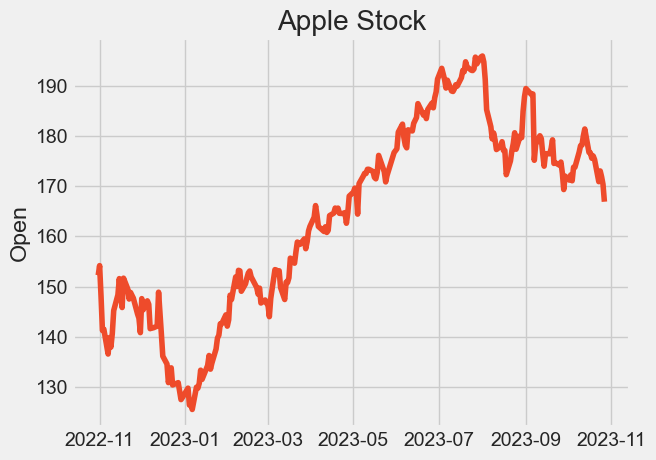

In [7]:
color = '#EE4B2B'
plt.plot(apple['Open'], c=color)
plt.ylabel('Open')
plt.title('Apple Stock')
plt.show()

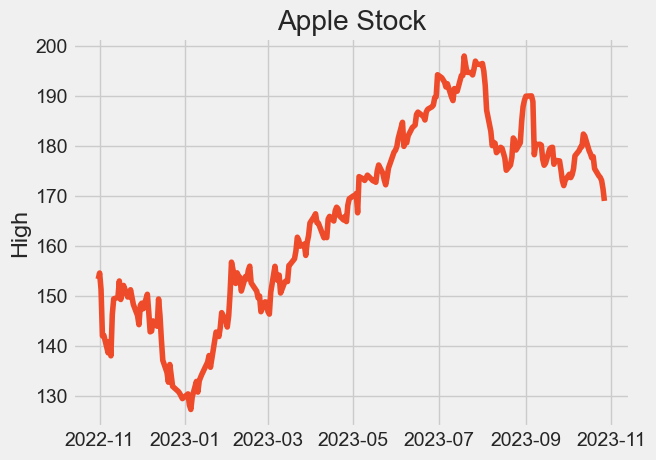

In [8]:
plt.plot(apple['High'], color=color)
plt.ylabel('High')
plt.title('Apple Stock')
plt.show()

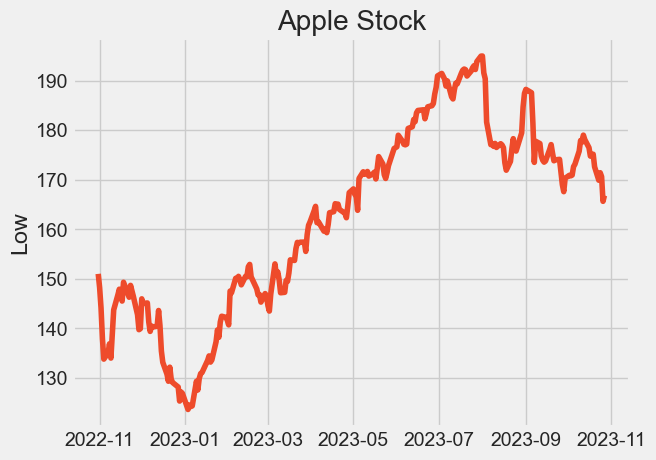

In [9]:
plt.plot(apple['Low'], color=color)
plt.ylabel('Low')
plt.title('Apple Stock')
plt.show()

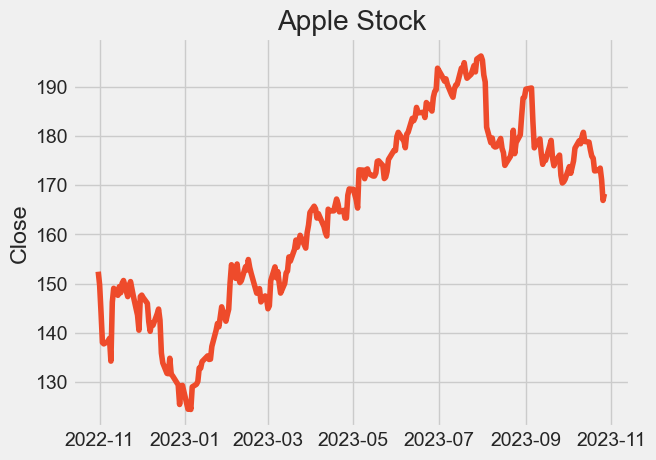

In [10]:
plt.plot(apple['Close'], color=color)
plt.ylabel('Close')
plt.title('Apple Stock')
plt.show()

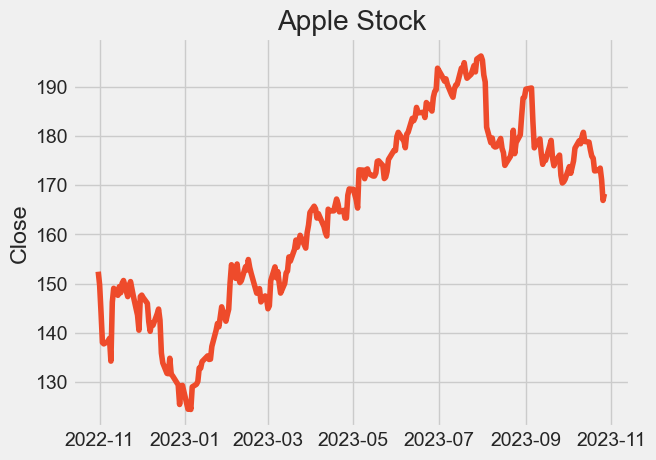

In [11]:
plt.plot(apple['Close'], color=color)
plt.ylabel('Close')
plt.title('Apple Stock')
plt.show()

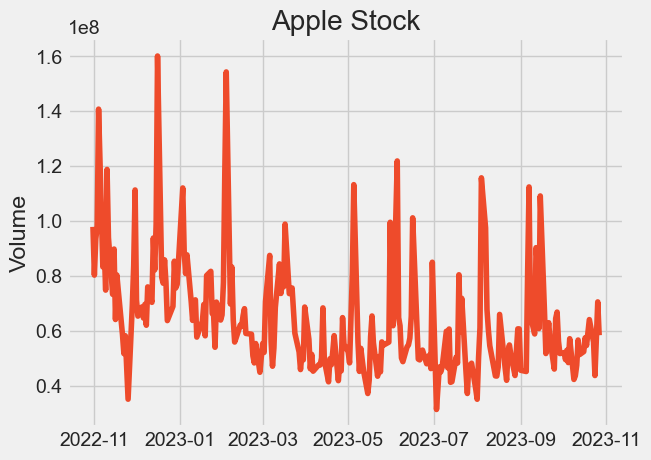

In [12]:
plt.plot(apple['Volume'], color=color)
plt.ylabel('Volume')
plt.title('Apple Stock')
plt.show()

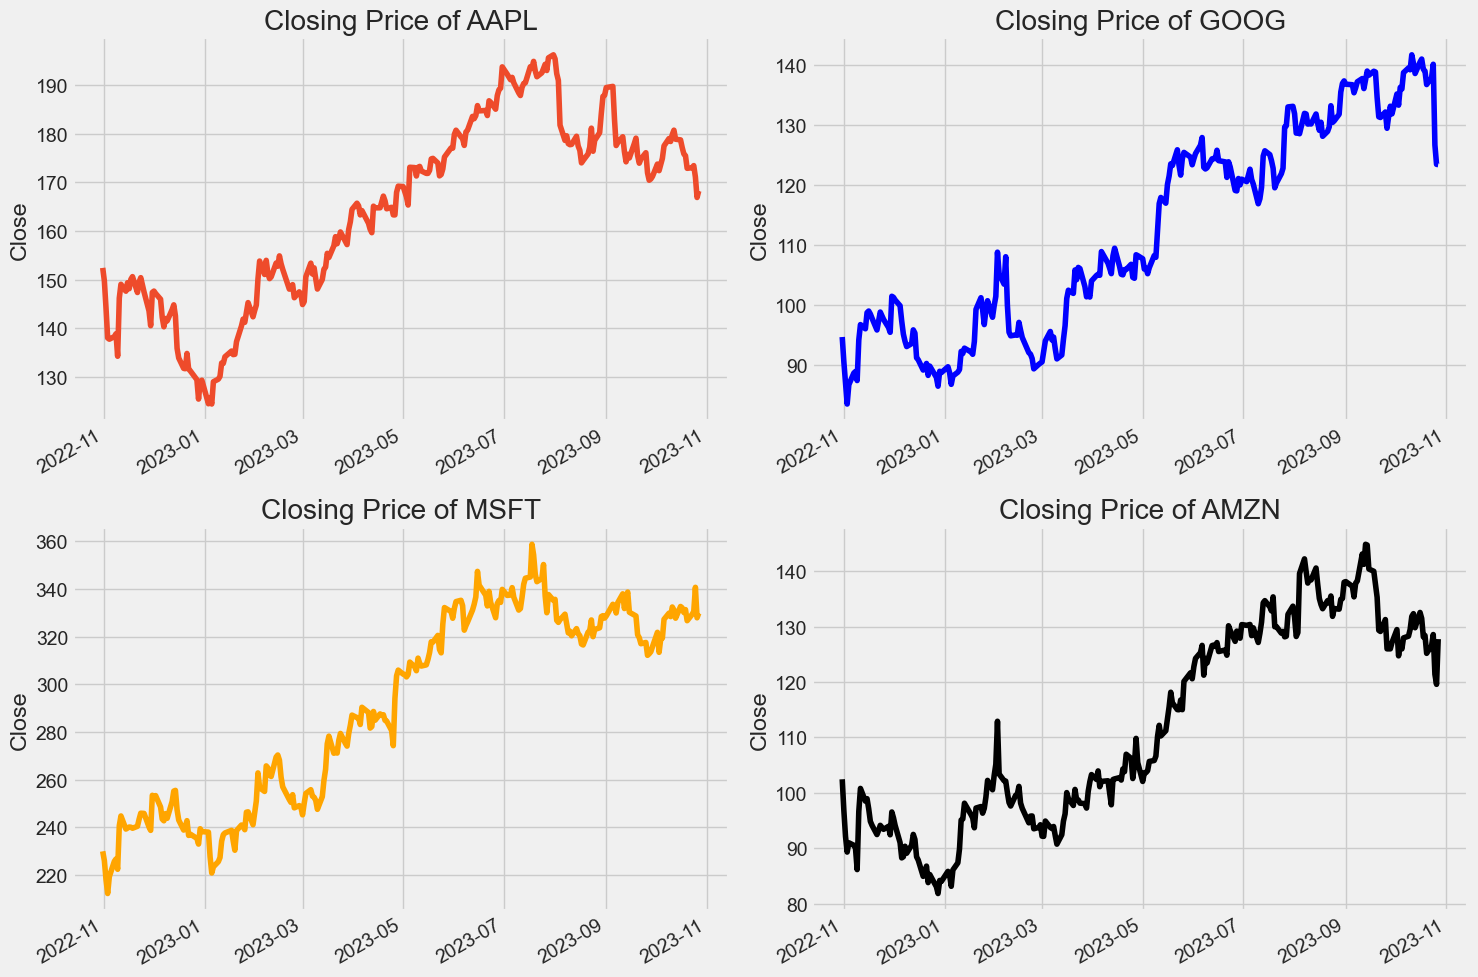

In [13]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
colors = [color, 'blue', 'orange', 'black']

for i, company in enumerate(dfs, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot(color=colors[i - 1])
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stocks[i - 1]}")
    
plt.tight_layout()

In [14]:
end_date = datetime(2023, 10, 29)
start_date = datetime(end_date.year - 10, end_date.month, end_date.day)

In [15]:
df = yf.Ticker(stocks[0]).history(start=start_date, end=end_date)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-10-29 00:00:00-04:00,16.715365,16.808250,16.038048,16.104750,635807200,0.0,0.0
2013-10-30 00:00:00-04:00,16.196078,16.442630,16.115348,16.360966,354163600,0.0,0.0
2013-10-31 00:00:00-04:00,16.364076,16.441688,16.247813,16.292385,275696400,0.0,0.0
2013-11-01 00:00:00-04:00,16.333540,16.357852,16.078572,16.209173,274890000,0.0,0.0
2013-11-04 00:00:00-05:00,16.242514,16.420805,16.171136,16.418623,244627600,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,170.910004,174.009995,169.929993,173.000000,55980100,0.0,0.0
2023-10-24 00:00:00-04:00,173.050003,173.669998,171.449997,173.440002,43816600,0.0,0.0
2023-10-25 00:00:00-04:00,171.880005,173.059998,170.649994,171.100006,57157000,0.0,0.0


In [16]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values.reshape(-1, 1) # değerler 2d dizi haline getirildi
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
test_data_len = int(np.ceil( len(dataset) * .05 ))
training_data_len

2392

In [17]:
test_data_len

126

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) # değerler 0 ve 1 arasında değerler alacak şekilde normalize edildi

scaled_data

array([[0.0024143 ],
       [0.00383365],
       [0.00345374],
       ...,
       [0.86103698],
       [0.83771493],
       [0.84508271]])

In [19]:
train_data = scaled_data[0 : int(training_data_len), :]

In [20]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
WINDOW_SIZE = 60
# Split the data into x_train and y_train data sets
# 59 değer x traine gider 60. değer y traine
x_train = []
y_train = []

for i in range(WINDOW_SIZE, len(train_data)):
    x_train.append(train_data[i-WINDOW_SIZE:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()


'''
    x_train : y_train
    0, 1, 2, ..., 59 : 60    1.dizi # 0, 1 gibi değerler train_data'daki o indexdeti değerler
    1, 2, 3, ..., 60 : 61    2.dizi
    ...
'''

[array([0.0024143 , 0.00383365, 0.00345374, 0.00299277, 0.00415305,
       0.00392863, 0.00367159, 0.00220751, 0.00360906, 0.00334676,
       0.00351356, 0.00362121, 0.00492899, 0.00437845, 0.00327386,
       0.00343363, 0.00264341, 0.00370977, 0.00347703, 0.00416131,
       0.00583906, 0.00802048, 0.00977636, 0.00893575, 0.01155655,
       0.0113273 , 0.01183099, 0.01046238, 0.01157564, 0.0114228 ,
       0.01069512, 0.01055269, 0.00949152, 0.01002471, 0.00958875,
       0.00885584, 0.00775994, 0.0085519 , 0.01221131, 0.01179099,
       0.01113627, 0.0104745 , 0.00950715, 0.01063606, 0.00926573,
       0.00715554, 0.0076679 , 0.00699231, 0.00758628, 0.00638096,
       0.00575921, 0.00624372, 0.00809515, 0.01000042, 0.00946025,
       0.0071017 , 0.00856062, 0.00898437, 0.00979542, 0.00803961])]
[0.008808964873774194]

[array([0.0024143 , 0.00383365, 0.00345374, 0.00299277, 0.00415305,
       0.00392863, 0.00367159, 0.00220751, 0.00360906, 0.00334676,
       0.00351356, 0.00362121, 0.0

"\n    x_train : y_train\n    0, 1, 2, ..., 59 : 60    1.dizi # 0, 1 gibi değerler train_data'daki o indexdeti değerler\n    1, 2, 3, ..., 60 : 61    2.dizi\n    ...\n"

In [21]:
'''  2d
    [
        [2.71, 2.15],
        [3, 5]
    ] ->
    
    3d
    [ 
        [[2.71], [2.15]], 
        [[3], [5]]
    ]
'''
x_train, y_train = np.array(x_train), np.array(y_train) # veri setleri numpya çevrilir


In [22]:
x_train.shape, y_train.shape

((2332, 60), (2332,))

In [23]:
x_train

array([[0.0024143 , 0.00383365, 0.00345374, ..., 0.00898437, 0.00979542,
        0.00803961],
       [0.00383365, 0.00345374, 0.00299277, ..., 0.00979542, 0.00803961,
        0.00880896],
       [0.00345374, 0.00299277, 0.00415305, ..., 0.00803961, 0.00880896,
        0.00116713],
       ...,
       [0.70912257, 0.715411  , 0.74514311, ..., 0.82657456, 0.81795627,
        0.81790099],
       [0.715411  , 0.74514311, 0.76544233, ..., 0.81795627, 0.81790099,
        0.84359027],
       [0.74514311, 0.76544233, 0.75016259, ..., 0.81790099, 0.84359027,
        0.8506064 ]])

In [24]:
y_train

array([8.80896487e-03, 1.16712957e-03, 1.68502615e-04, ...,
       8.43590267e-01, 8.50606400e-01, 8.50109203e-01])

In [25]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # numpya çevrilen x_train içerisindeki her değer 2d dizi haline getirilir

In [26]:
x_train

array([[[0.0024143 ],
        [0.00383365],
        [0.00345374],
        ...,
        [0.00898437],
        [0.00979542],
        [0.00803961]],

       [[0.00383365],
        [0.00345374],
        [0.00299277],
        ...,
        [0.00979542],
        [0.00803961],
        [0.00880896]],

       [[0.00345374],
        [0.00299277],
        [0.00415305],
        ...,
        [0.00803961],
        [0.00880896],
        [0.00116713]],

       ...,

       [[0.70912257],
        [0.715411  ],
        [0.74514311],
        ...,
        [0.82657456],
        [0.81795627],
        [0.81790099]],

       [[0.715411  ],
        [0.74514311],
        [0.76544233],
        ...,
        [0.81795627],
        [0.81790099],
        [0.84359027]],

       [[0.74514311],
        [0.76544233],
        [0.75016259],
        ...,
        [0.81790099],
        [0.84359027],
        [0.8506064 ]]])

In [27]:
x_train.shape[1]

60

In [28]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2332/2332 [==============================] - 116s 48ms/step - loss: 0.0013


In [60]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
test_data = scaled_data[training_data_len - 60: , :]
test_data

array([[0.76544233],
       [0.75016259],
       [0.7662697 ],
       [0.75121066],
       [0.74541876],
       [0.74746283],
       [0.7631527 ],
       [0.75956167],
       [0.77132899],
       [0.76237918],
       [0.75597072],
       [0.73348576],
       [0.73586127],
       [0.7385683 ],
       [0.72370732],
       [0.73039201],
       [0.7275745 ],
       [0.71597294],
       [0.71928773],
       [0.74757339],
       [0.76304222],
       [0.75072242],
       [0.75773856],
       [0.74514252],
       [0.73359624],
       [0.74447964],
       [0.75619168],
       [0.75840152],
       [0.77420178],
       [0.76950588],
       [0.78276479],
       [0.793151  ],
       [0.78514038],
       [0.7912174 ],
       [0.79850978],
       [0.78762637],
       [0.7841459 ],
       [0.80138257],
       [0.81016662],
       [0.82419897],
       [0.83121519],
       [0.828232  ],
       [0.81790099],
       [0.82287322],
       [0.8083435 ],
       [0.80154833],
       [0.79768123],
       [0.827

In [32]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)


In [33]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [34]:
predictions = model.predict(x_test)

4/4 [==============================] - 2s 39ms/step


In [35]:
predictions.shape

(125, 1)

In [36]:
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.274988988268423

C:\Users\Tacab\AppData\Local\Temp\ipykernel_10344\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


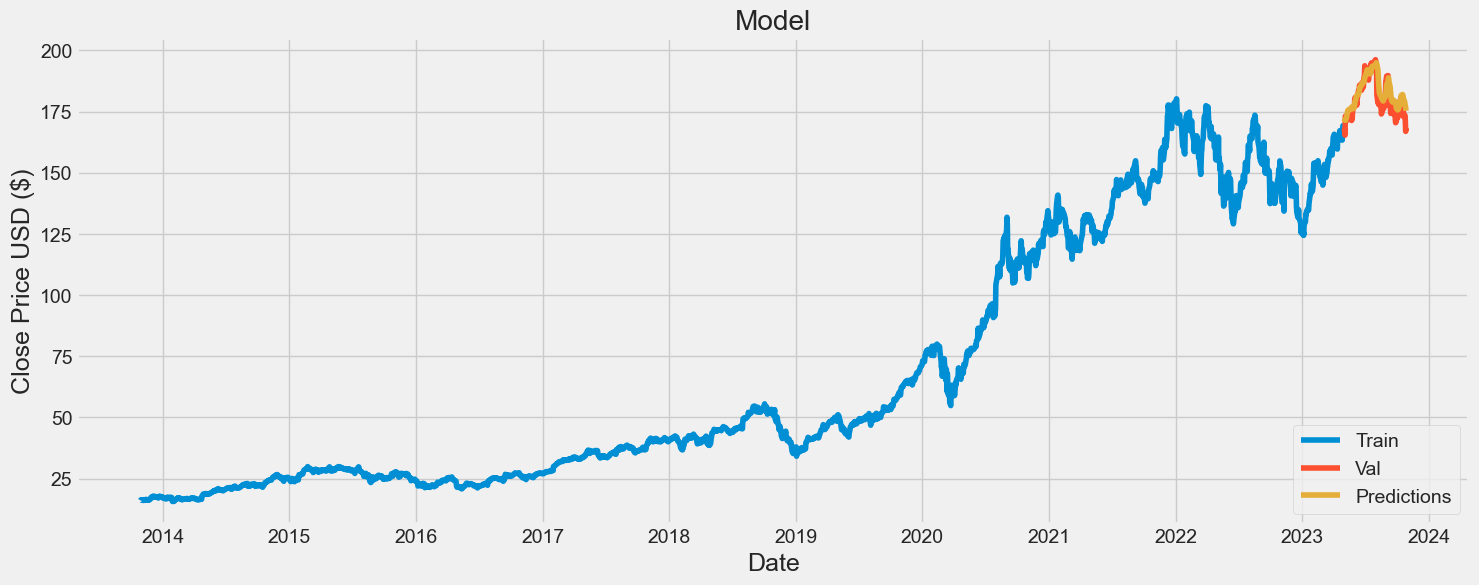

In [37]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
data

,Close
Date,
2013-10-29 00:00:00-04:00,16.104750
2013-10-30 00:00:00-04:00,16.360966
2013-10-31 00:00:00-04:00,16.292385
2013-11-01 00:00:00-04:00,16.209173
2013-11-04 00:00:00-05:00,16.418623
...,...
2023-10-23 00:00:00-04:00,173.000000
2023-10-24 00:00:00-04:00,173.440002
2023-10-25 00:00:00-04:00,171.100006


In [39]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
pred_data = scaled_data[len(data) - 60: , :]
# Create the data sets x_test and y_test
preds = np.array([])
for i in range(0, 30):
    row = np.reshape(pred_data[i :], (1, 60, 1))
    prediction = model.predict(row)
    pred_data = np.append(pred_data, prediction, axis=0)
    preds = np.append(preds, prediction)

1/1 [==============================] - 0s 38ms/step


In [40]:
pred_data.shape

(90, 1)

In [41]:
preds = preds.reshape(-1, 1)
preds = scaler.inverse_transform(preds)
preds = preds.reshape(30)
preds

array([174.19412867, 174.30844942, 174.95151848, 175.86524528,
       176.89198017, 177.93841589, 178.95195951, 179.90618545,
       180.79073222, 181.60512639, 182.35406991, 183.04479323,
       183.68509706, 184.28231946, 184.84299149, 185.37234232,
       185.87460047, 186.35290776, 186.80960977, 187.246385  ,
       187.66450308, 188.06486782, 188.44816783, 188.81496261,
       189.16573635, 189.50098399, 189.82116819, 190.1267516 ,
       190.41819691, 190.69606359])

In [42]:
data_with_predicts = data.copy()
data_with_predicts = data_with_predicts.reset_index()
data_with_predicts

,Date,Close
0,2013-10-29 00:00:00-04:00,16.104750
1,2013-10-30 00:00:00-04:00,16.360966
2,2013-10-31 00:00:00-04:00,16.292385
3,2013-11-01 00:00:00-04:00,16.209173
4,2013-11-04 00:00:00-05:00,16.418623
...,...,...
2512,2023-10-23 00:00:00-04:00,173.000000
2513,2023-10-24 00:00:00-04:00,173.440002
2514,2023-10-25 00:00:00-04:00,171.100006
2515,2023-10-26 00:00:00-04:00,166.889999


In [43]:
preds

array([174.19412867, 174.30844942, 174.95151848, 175.86524528,
       176.89198017, 177.93841589, 178.95195951, 179.90618545,
       180.79073222, 181.60512639, 182.35406991, 183.04479323,
       183.68509706, 184.28231946, 184.84299149, 185.37234232,
       185.87460047, 186.35290776, 186.80960977, 187.246385  ,
       187.66450308, 188.06486782, 188.44816783, 188.81496261,
       189.16573635, 189.50098399, 189.82116819, 190.1267516 ,
       190.41819691, 190.69606359])

In [44]:
temp = []
last_date = data_with_predicts['Date'].max()
for i, predicted in enumerate(preds, 1):
    date = last_date + timedelta(days=i)
    row = pd.DataFrame([[date, predicted]])
    temp.append(row)

In [45]:
predicted_df = pd.concat(temp).reset_index(drop=True)

In [46]:
predicted_df.columns = data_with_predicts.columns

In [47]:
predicted_df

,Date,Close
0,2023-10-28 00:00:00-04:00,174.194129
1,2023-10-29 00:00:00-04:00,174.308449
2,2023-10-30 00:00:00-04:00,174.951518
3,2023-10-31 00:00:00-04:00,175.865245
4,2023-11-01 00:00:00-04:00,176.891980
5,2023-11-02 00:00:00-04:00,177.938416
6,2023-11-03 00:00:00-04:00,178.951960
7,2023-11-04 00:00:00-04:00,179.906185
8,2023-11-05 00:00:00-04:00,180.790732
9,2023-11-05 23:00:00-05:00,181.605126


In [48]:
data_copy = data.reset_index().sort_values(by='Date').copy()

In [49]:
data_copy

,Date,Close
0,2013-10-29 00:00:00-04:00,16.104750
1,2013-10-30 00:00:00-04:00,16.360966
2,2013-10-31 00:00:00-04:00,16.292385
3,2013-11-01 00:00:00-04:00,16.209173
4,2013-11-04 00:00:00-05:00,16.418623
...,...,...
2512,2023-10-23 00:00:00-04:00,173.000000
2513,2023-10-24 00:00:00-04:00,173.440002
2514,2023-10-25 00:00:00-04:00,171.100006
2515,2023-10-26 00:00:00-04:00,166.889999


In [50]:
data_copy['Date'] = data_copy['Date'].dt.tz_localize(None)

In [51]:
predicted_df['Date'] = predicted_df['Date'].dt.tz_localize(None)

In [52]:
data_copy = data_copy.sort_values(by='Date')

<Axes: xlabel='Date', ylabel='Close'>

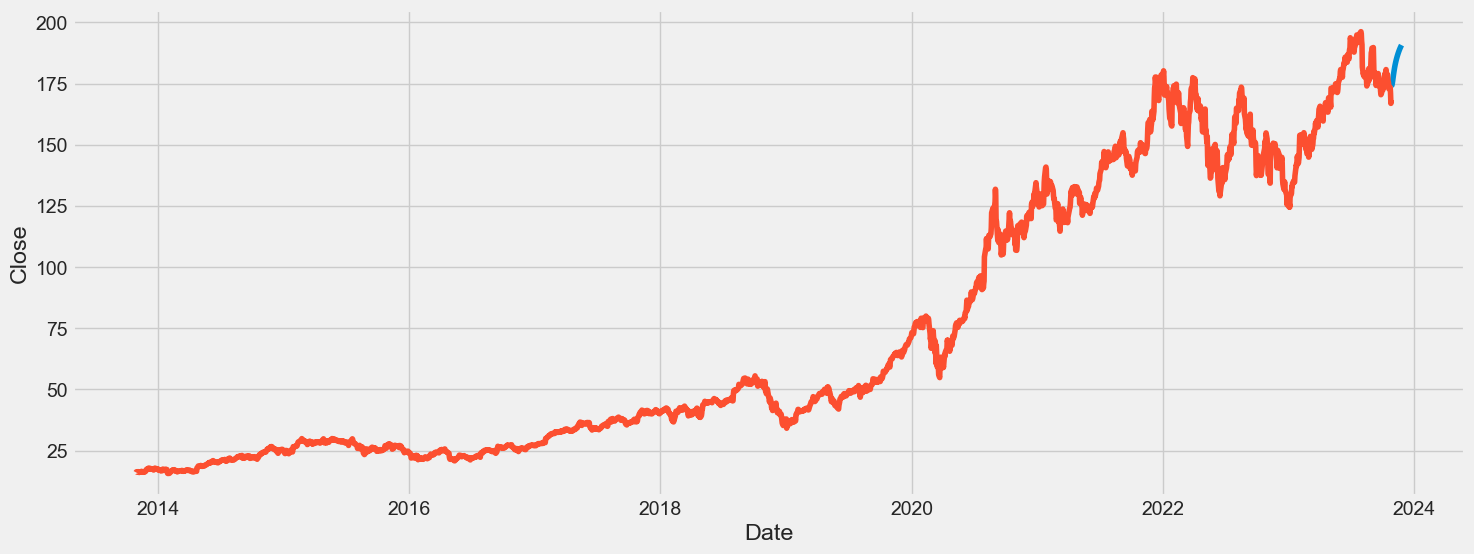

In [53]:
plt.figure(figsize=(16,6))
sns.lineplot(predicted_df, x='Date', y='Close')
sns.lineplot(data_copy, x='Date', y='Close')

In [54]:
data_copy = data_copy.query('Date >= "2023-01-01" ')

<Axes: xlabel='Date', ylabel='Close'>

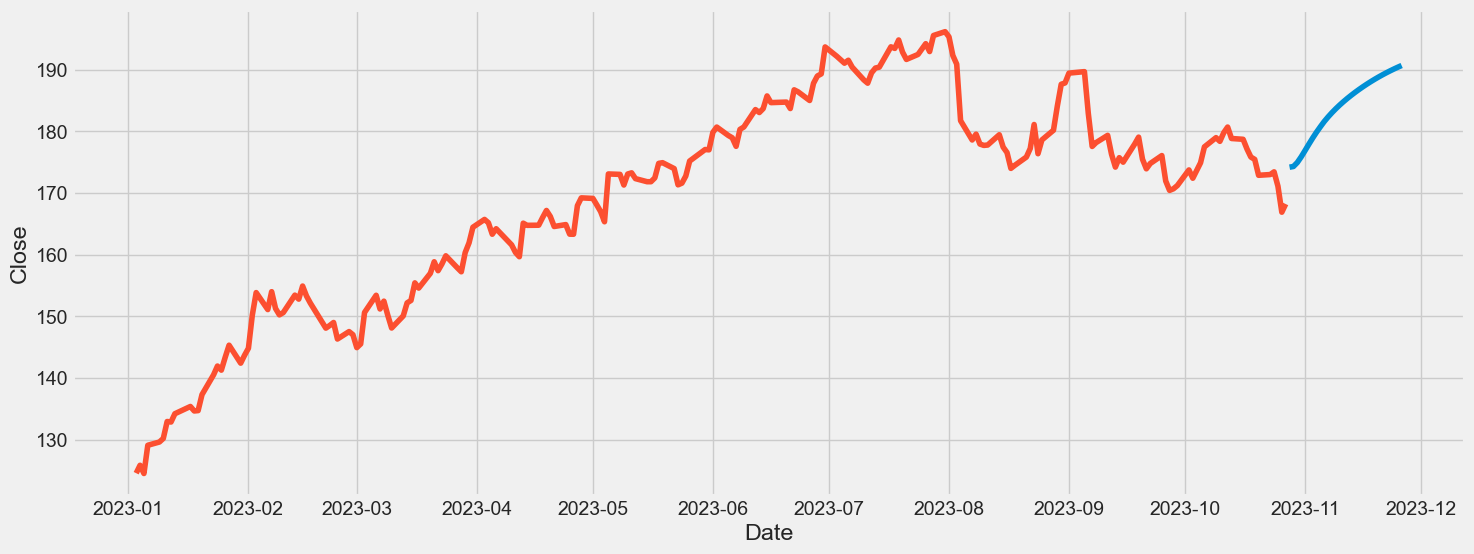

In [55]:
plt.figure(figsize=(16,6))
sns.lineplot(predicted_df, x='Date', y='Close')
sns.lineplot(data_copy, x='Date', y='Close')

In [56]:
data_with_predicted = pd.concat([data_copy, predicted_df]).reset_index(drop=True)

In [57]:
first_prediction_date = predicted_df['Date'].min()
data_with_predicted['is_a_prediction'] = data_with_predicted['Date'].apply(lambda x: 1 if x >= first_prediction_date else 0)

<Axes: xlabel='Date', ylabel='Close'>

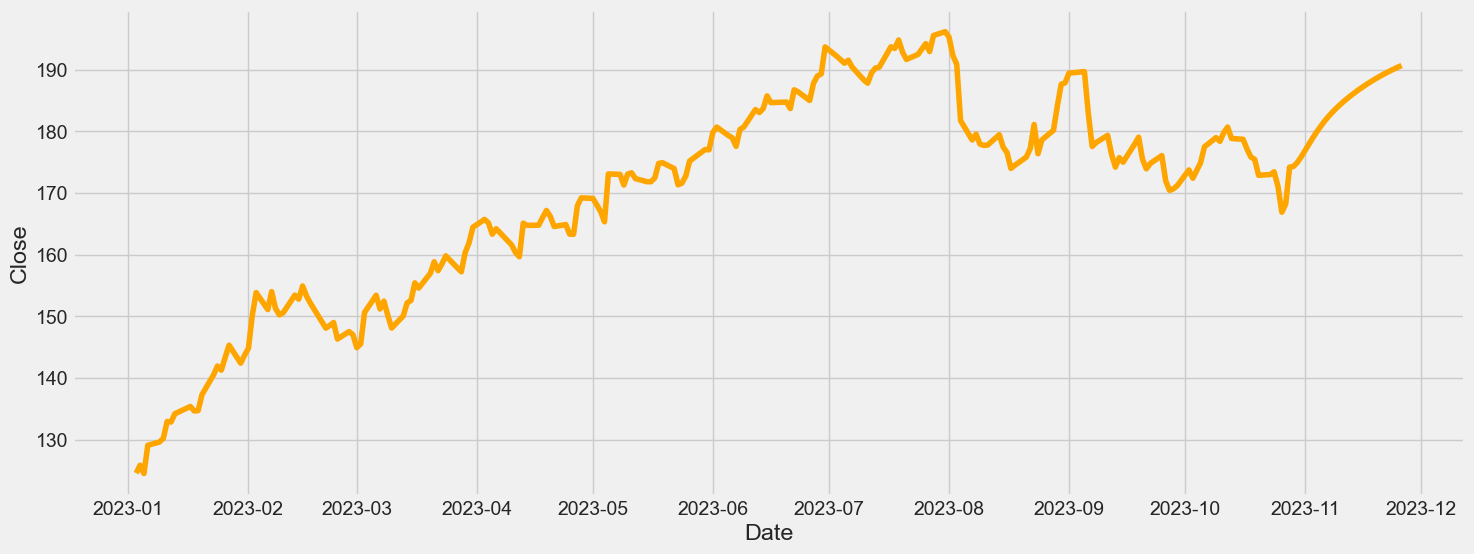

In [58]:
plt.figure(figsize=(16,6))
sns.lineplot(data_with_predicted, x='Date', y='Close', color='orange')